# Class-Conditional Synthesis with Latent Diffusion Models

In [7]:
import os
import sys
sys.path.append('./latent-diffusion')
sys.path.append('./taming-transformers')

TRAIN_RUN_NAME = 'overfit_local_try4'
CKPT_NAME = 'checkpoints/init_hacked.ckpt'

train_outputs_dir = os.path.join('./latent-diffusion/logs/', TRAIN_RUN_NAME)

## Inspect train run

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

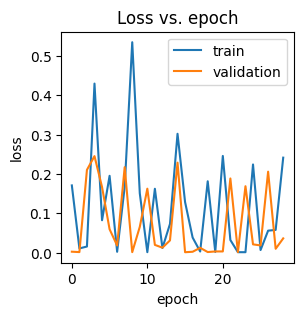

In [6]:
metrics_file_path = os.path.join(train_outputs_dir, "testtube/version_0/metrics.csv")
metrics_df = pd.read_csv(metrics_file_path)
# metrics_df = plot_training_metrics(model_train_dir)

epoch = metrics_df['epoch'].dropna().values

train_loss = metrics_df['train/loss_simple_epoch'].dropna().values
val_loss = metrics_df['val/loss_simple'].dropna().values

plt.figure(figsize=(3, 3))
plt.plot(train_loss, label='train')
plt.plot(val_loss, label='validation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs. epoch')
plt.legend()
plt.show()

In [8]:
images_dir = os.path.join(train_outputs_dir, "images/val")

if os.path.exists(images_dir) and os.listdir(images_dir):
    N = 10
    plt.figure(figsize=(20, 5))
    for i, img_path in enumerate(os.listdir(images_dir)):
        img = plt.imread(os.path.join(images_dir, img_path))
    
        plt.subplot(1, N, i+1)
        plt.imshow(img, cmap='gray', vmin=-1., vmax=1.)
    
        plt.xticks([])
        plt.yticks([])
        i += 1
        if i >= N:
            break
        
                   
    plt.show()

## Test Inference

In [10]:
checkpoint = os.path.join('./latent-diffusion/logs/', os.path.join(TRAIN_RUN_NAME, CKPT_NAME))

In [11]:
#@title loading utils
import torch
from omegaconf import OmegaConf

from ldm.util import instantiate_from_config


def load_model_from_config(config, ckpt):
    print(f"Loading model from {ckpt}")
    pl_sd = torch.load(ckpt)#, map_location="cpu")
    sd = pl_sd["state_dict"]
    model = instantiate_from_config(config.model)
    m, u = model.load_state_dict(sd, strict=False)
    model.cuda()
    model.eval()
    return model


def get_model():
    config = OmegaConf.load("latent-diffusion/configs/latent-diffusion/ct-rsna.yaml")  
    model = load_model_from_config(config, checkpoint)
    return model

In [12]:
from ldm.models.diffusion.ddim import DDIMSampler

model = get_model()
sampler = DDIMSampler(model)

Loading model from ./latent-diffusion/logs/overfit_local_try4/checkpoints/init_hacked.ckpt
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 400.92 M params.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 3, 64, 64) = 12288 dimensions.
making attention of type 'vanilla' with 512 in_channels


And go. Quality, sampling speed and diversity are best controlled via the `scale`, `ddim_steps` and `ddim_eta` variables. As a rule of thumb, higher values of `scale` produce better samples at the cost of a reduced output diversity. Furthermore, increasing `ddim_steps` generally also gives higher quality samples, but returns are diminishing for values > 250. Fast sampling (i e. low values of `ddim_steps`) while retaining good quality can be achieved by using `ddim_eta = 0.0`.

rendering 1 examples of class '0' in 20 steps and using s=3.00.
Data shape for DDIM sampling is (1, 3, 64, 64), eta 0.0
Running DDIM Sampling with 20 timesteps


DDIM Sampler: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:02<00:00,  7.76it/s]


rendering 1 examples of class '1' in 20 steps and using s=3.00.
Data shape for DDIM sampling is (1, 3, 64, 64), eta 0.0
Running DDIM Sampling with 20 timesteps


DDIM Sampler: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:02<00:00,  8.06it/s]


rendering 1 examples of class '2' in 20 steps and using s=3.00.
Data shape for DDIM sampling is (1, 3, 64, 64), eta 0.0
Running DDIM Sampling with 20 timesteps


DDIM Sampler: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:02<00:00,  8.15it/s]


rendering 1 examples of class '3' in 20 steps and using s=3.00.
Data shape for DDIM sampling is (1, 3, 64, 64), eta 0.0
Running DDIM Sampling with 20 timesteps


DDIM Sampler: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:02<00:00,  8.08it/s]


rendering 1 examples of class '4' in 20 steps and using s=3.00.
Data shape for DDIM sampling is (1, 3, 64, 64), eta 0.0
Running DDIM Sampling with 20 timesteps


DDIM Sampler: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:02<00:00,  8.03it/s]


rendering 1 examples of class '5' in 20 steps and using s=3.00.
Data shape for DDIM sampling is (1, 3, 64, 64), eta 0.0
Running DDIM Sampling with 20 timesteps


DDIM Sampler: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:02<00:00,  7.98it/s]


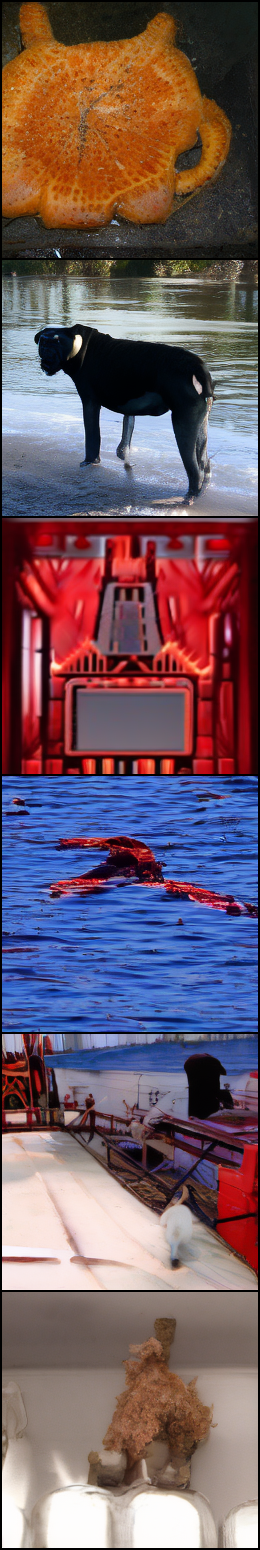

In [13]:
import numpy as np 
from PIL import Image
from einops import rearrange
from torchvision.utils import make_grid


classes = list(range(6))   # define classes to be sampled here
n_samples_per_class = 1

ddim_steps = 20
ddim_eta = 0.0
scale = 3.0   # for unconditional guidance


all_samples = list()

with torch.no_grad():
    with model.ema_scope():
        uc = model.get_learned_conditioning(
            {model.cond_stage_key: torch.tensor(n_samples_per_class*[5]).to(model.device)}
            )
        
        for class_label in classes:
            print(f"rendering {n_samples_per_class} examples of class '{class_label}' in {ddim_steps} steps and using s={scale:.2f}.")
            xc = torch.tensor(n_samples_per_class*[class_label])
            c = model.get_learned_conditioning({model.cond_stage_key: xc.to(model.device)})
            
            samples_ddim, _ = sampler.sample(S=ddim_steps,
                                             conditioning=c,
                                             batch_size=n_samples_per_class,
                                             shape=[3, 64, 64],
                                             verbose=False,
                                             unconditional_guidance_scale=scale,
                                             unconditional_conditioning=uc, 
                                             eta=ddim_eta)

            x_samples_ddim = model.decode_first_stage(samples_ddim)
            x_samples_ddim = torch.clamp((x_samples_ddim+1.0)/2.0, 
                                         min=0.0, max=1.0)
            all_samples.append(x_samples_ddim)


# display as grid
grid = torch.stack(all_samples, 0)
grid = rearrange(grid, 'n b c h w -> (n b) c h w')
grid = make_grid(grid, nrow=n_samples_per_class)

# to image
grid = 255. * rearrange(grid, 'c h w -> h w c').cpu().numpy()
Image.fromarray(grid.astype(np.uint8))